In [31]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import kurtosis, mode
import pandas_profiling
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import _plotly_future_
from _plotly_future_ import v4_subplots

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.plotly as py
import seaborn as sns

import matplotlib.pyplot as plt
from datetime import datetime
import random
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

import yaml
#import boto3
from io import BytesIO
import datetime
from datetime import timedelta, datetime, date

hour = timedelta(hours=1)
day = timedelta(days=1)
%matplotlib inline


from itertools import cycle
pd.set_option('max_columns', 50)
plt.style.use('bmh')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [32]:
path_sell_price= '/Users/asadmolayari/Desktop/my_courses/Kaggle/M5/m5-forecasting-accuracy/sell_prices.csv'
path_trin_val= '/Users/asadmolayari/Desktop/my_courses/Kaggle/M5/m5-forecasting-accuracy/sales_train_validation.csv'
path_cld= '/Users/asadmolayari/Desktop/my_courses/Kaggle/M5/m5-forecasting-accuracy/calendar.csv'
path_sbmssion='/Users/asadmolayari/Desktop/my_courses/Kaggle/M5/m5-forecasting-accuracy/sample_submission.csv'

In [34]:
df_train=pd.read_csv(path_trin_val)
df_train

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,...,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4
5,HOBBIES_1_006_CA_1_validation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,1,0,0,1,4,0,0,0,1,0,1,0,0,0,2,0,0
6,HOBBIES_1_007_CA_1_validation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,1,1
7,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,12,15,0,0,0,4,6,5,7,0,13,2,2,20,9,3,0,1,0,...,2,12,38,22,2,0,10,26,8,12,4,5,2,8,4,0,0,1,37,3,4,6,3,2,1
8,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,2,0,7,3,0,2,3,9,0,0,4,3,1,0,4,4,1,2,0,...,1,2,0,3,0,0,0,0,0,1,1,0,7,0,0,0,0,1,1,6,0,0,0,0,0
9,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,...,1,1,0,3,2,2,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,2,0,2


In [35]:
df_price=pd.read_csv(path_sell_price)
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
store_id      object
item_id       object
wm_yr_wk      int64
sell_price    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


In [56]:
df_cld=pd.read_csv(path_cld)
df_cld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
date            1969 non-null object
wm_yr_wk        1969 non-null int64
weekday         1969 non-null object
wday            1969 non-null int64
month           1969 non-null int64
year            1969 non-null int64
d               1969 non-null object
event_name_1    162 non-null object
event_type_1    162 non-null object
event_name_2    5 non-null object
event_type_2    5 non-null object
snap_CA         1969 non-null int64
snap_TX         1969 non-null int64
snap_WI         1969 non-null int64
dtypes: int64(7), object(7)
memory usage: 215.4+ KB


In [49]:
df_sbmission=pd.read_csv(path_sbmssion)
df_sbmission.head(3)

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# visualization

In [10]:
d_cols = [c for c in df_train.columns if 'd_' in c]
print(len(d_cols))
#d_cols

1913


In [11]:
#how many months and years
print( 'num of months', len(d_cols)/12)
print( 'num of years', len(d_cols)/12/30)

num of months 159.41666666666666
num of years 5.313888888888888


In [15]:
example=example.rename(columns={8412:'FOODS_3_090_CA_3'})

In [16]:
example=example.reset_index().rename(columns={'index':'d'})

In [17]:
example=example.merge(df_cld, how='left', validate='1:1')

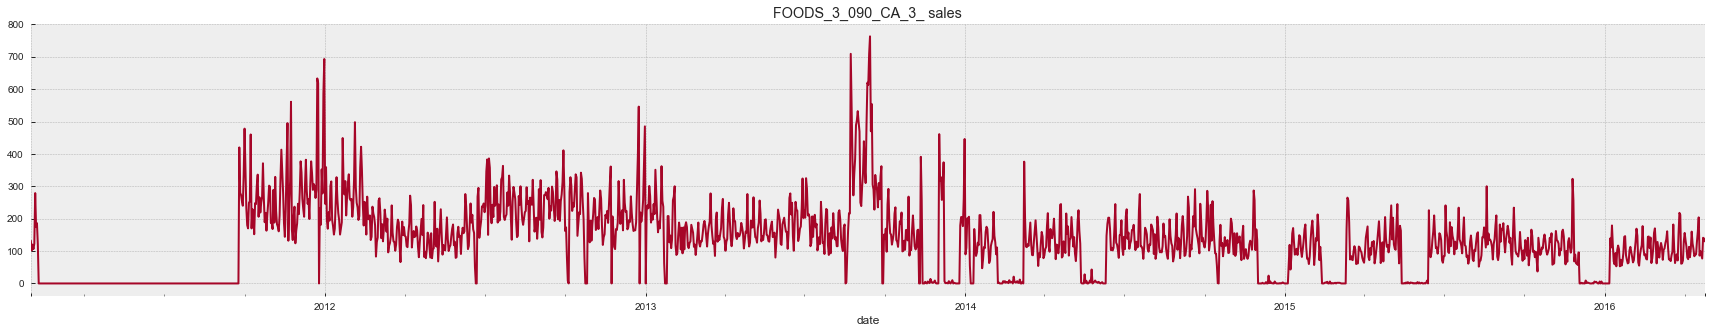

In [18]:
example['date']=pd.to_datetime(example['date'])
example.set_index('date')['FOODS_3_090_CA_3'][7:].plot(figsize=(30,5),color=next(color_cycle),title='FOODS_3_090_CA_3_ sales')

In [19]:
example=pd.DataFrame(example.iloc[6:,:])

In [61]:
example['date']=pd.to_datetime(example['date'])

In [63]:
example=example.infer_objects() 

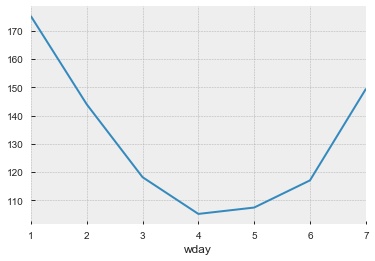

In [67]:
example.groupby('wday').mean()['FOODS_3_090_CA_3'].plot()

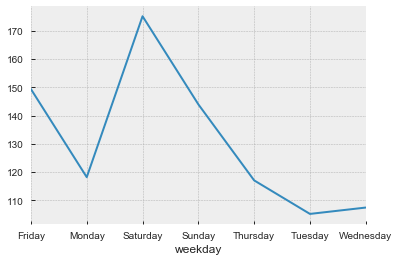

In [68]:
example.groupby('weekday').mean()['FOODS_3_090_CA_3'].plot()

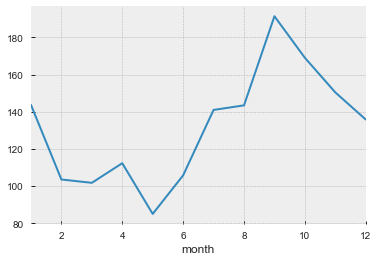

In [69]:
example.groupby('month').mean()['FOODS_3_090_CA_3'].plot()

In [70]:
df_train.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,...,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4


In [25]:
past_sales=df_train.set_index('id')[d_cols].T.merge(df_cld.set_index('d')['date'],\
            left_index=True, right_index=True,validate='1:1').set_index('date')

In [29]:
print('The lowest sale date was:', past_sales.sum(axis=1).sort_values().index[0],
     'with', past_sales.sum(axis=1).sort_values().values[0], 'sales')
print('The highest sale date was:', past_sales.sum(axis=1).sort_values(ascending=False).index[0],
     'with', past_sales.sum(axis=1).sort_values(ascending=False).values[0], 'sales')

The lowest sale date was: 2012-12-25 with 11 sales
The highest sale date was: 2016-03-06 with 57218 sales


# MODELING

In [12]:
df_sub=pd.read_csv(path_sbmssion)

## lgbm Model

In [13]:
import dask.dataframe as dd

import lightgbm as lgb
import xgboost as xgb
from sklearn import preprocessing, metrics
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold,GroupKFold, GridSearchCV, train_test_split, TimeSeriesSplit
import gc
import os

In [14]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [61]:
def melt_and_merge(calendar, sell_prices, sales_train_validation, submission, nrows = 55000000, merge = False):
    
    # melt sales data, get it ready for training
    sales_train_validation = pd.melt(sales_train_validation, id_vars = ['id', 'item_id', 'dept_id',\
                            'cat_id', 'store_id', 'state_id'], var_name = 'day', value_name = 'demand')
    print('Melted sales train validation has {} rows and {} columns'.format(sales_train_validation.shape[0]\
                                                                            , sales_train_validation.shape[1]))
    #sales_train_validation = reduce_mem_usage(sales_train_validation)
    
    # seperate test dataframes
    test1_rows = [row for row in submission['id'] if 'validation' in row]
    test2_rows = [row for row in submission['id'] if 'evaluation' in row]
    test1 = submission[submission['id'].isin(test1_rows)]
    test2 = submission[submission['id'].isin(test2_rows)]
    
    # change column names
    test1.columns = ['id', 'd_1914', 'd_1915', 'd_1916', 'd_1917', 'd_1918', 'd_1919', 'd_1920', 'd_1921', 'd_1922', 'd_1923', 'd_1924', 'd_1925', 'd_1926', 'd_1927', 'd_1928', 'd_1929', 'd_1930', 'd_1931', 
                      'd_1932', 'd_1933', 'd_1934', 'd_1935', 'd_1936', 'd_1937', 'd_1938', 'd_1939', 'd_1940', 'd_1941']
    test2.columns = ['id', 'd_1942', 'd_1943', 'd_1944', 'd_1945', 'd_1946', 'd_1947', 'd_1948', 'd_1949', 'd_1950', 'd_1951', 'd_1952', 'd_1953', 'd_1954', 'd_1955', 'd_1956', 'd_1957', 'd_1958', 'd_1959', 
                      'd_1960', 'd_1961', 'd_1962', 'd_1963', 'd_1964', 'd_1965', 'd_1966', 'd_1967', 'd_1968', 'd_1969']
    
    # get product table
    product = sales_train_validation[['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']].drop_duplicates()
    
    # merge with product table
    test1 = test1.merge(product, how = 'left', on = 'id')
    test2 = test2.merge(product, how = 'left', on = 'id')
    
    # 
    test1 = pd.melt(test1, id_vars = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name = 'day', value_name = 'demand')
    test2 = pd.melt(test2, id_vars = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name = 'day', value_name = 'demand')
    
    sales_train_validation['part'] = 'train'
    test1['part'] = 'test1'
    test2['part'] = 'test2'
    
    data = pd.concat([sales_train_validation, test1, test2], axis = 0)
    
    del sales_train_validation, test1, test2
    
    # get only a sample for fst training
    #data = data.loc[nrows:]
    
    # drop some calendar features
    #calendar.drop(['weekday', 'wday', 'month', 'year'], inplace = True, axis = 1)
    
    # delete test2 for now
    data = data[data['part'] != 'test2']
    breakpoint()
    if merge:
        # notebook crash with the entire dataset (maybee use tensorflow, dask, pyspark xD)
        data = pd.merge(data, calendar, how = 'left', left_on = ['day'], right_on = ['d'])
        data.drop(['d', 'day'], inplace = True, axis = 1)
        # get the sell price data (this feature should be very important)
        data = data.merge(sell_prices, on = ['store_id', 'item_id', 'wm_yr_wk'], how = 'left')
        print('Our final dataset to train has {} rows and {} columns'.format(data.shape[0], data.shape[1]))
    else: 
        pass
    
    breakpoint()
    gc.collect()
    
    return data


In [62]:
data = melt_and_merge(df_cld, df_price, df_train, df_sbmission, nrows = 27500000, merge = True)
gc.collect()

Melted sales train validation has 58327370 rows and 8 columns
> <ipython-input-61-ceccaa1bb25a>(50)melt_and_merge()
-> if merge:
(Pdb) c
Our final dataset to train has 59181090 rows and 22 columns
> <ipython-input-61-ceccaa1bb25a>(61)melt_and_merge()
-> gc.collect()
(Pdb) c


0

In [63]:
data

,id,item_id,dept_id,cat_id,store_id,state_id,demand,part,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,train,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,train,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,train,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,train,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,train,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
5,HOBBIES_1_006_CA_1_validation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,0,train,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
6,HOBBIES_1_007_CA_1_validation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,0,train,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
7,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,12,train,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,0.46
8,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,2,train,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,1.56
9,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,0,train,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,3.17


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59181090 entries, 0 to 59181089
Data columns (total 22 columns):
id              object
item_id         object
dept_id         object
cat_id          object
store_id        object
state_id        object
demand          int64
part            object
date            object
wm_yr_wk        int64
weekday         object
wday            int64
month           int64
year            int64
event_name_1    object
event_type_1    object
event_name_2    object
event_type_2    object
snap_CA         int64
snap_TX         int64
snap_WI         int64
sell_price      float64
dtypes: float64(1), int64(8), object(13)
memory usage: 10.1+ GB


In [65]:
data=reduce_mem_usage(data)

Mem. usage decreased to 7054.94 Mb (32.1% reduction)


In [85]:
data.groupby(['id'])['demand'].transform(lambda x: x.diff(7))

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
21          NaN
22          NaN
23          NaN
24          NaN
25          NaN
26          NaN
27          NaN
28          NaN
29          NaN
           ... 
59181060    0.0
59181061    0.0
59181062    0.0
59181063    0.0
59181064    0.0
59181065    0.0
59181066    0.0
59181067    0.0
59181068    0.0
59181069    0.0
59181070    0.0
59181071    0.0
59181072    0.0
59181073    0.0
59181074    0.0
59181075    0.0
59181076    0.0
59181077    0.0
59181078    0.0
59181079    0.0
59181080    0.0
59181081    0.0
59181082    0.0
59181083    0.0
59181084    0.0
59181085    0.0
59181086    0.0
59181087    0.0
59181088    0.0
59181089    0.0
Name: demand, Length: 59

In [152]:
data.iloc[:8700].groupby(['id'])['demand'].transform(lambda x: x.pct_change(periods=2)).replace(np.inf,np.nan).fillna(value=0)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
8670    0.0
8671    0.0
8672    0.0
8673    0.0
8674    0.0
8675    0.0
8676    0.0
8677    0.0
8678    0.0
8679    0.0
8680    0.0
8681    0.0
8682    0.0
8683    0.0
8684    0.0
8685    0.0
8686    0.0
8687    0.0
8688    0.0
8689    0.0
8690    0.0
8691    0.0
8692    0.0
8693    0.0
8694    0.0
8695    0.0
8696    0.0
8697    0.0
8698    0.0
8699    0.0
Name: demand, Length: 8700, dtype: float64

In [162]:
data.iloc[:500].groupby(['id'], as_index=False)['demand']

In [153]:
data.iloc[:200].groupby(['id'])['demand'].apply(lambda x:x.rolling(7).mean())

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
       ..
170   NaN
171   NaN
172   NaN
173   NaN
174   NaN
175   NaN
176   NaN
177   NaN
178   NaN
179   NaN
180   NaN
181   NaN
182   NaN
183   NaN
184   NaN
185   NaN
186   NaN
187   NaN
188   NaN
189   NaN
190   NaN
191   NaN
192   NaN
193   NaN
194   NaN
195   NaN
196   NaN
197   NaN
198   NaN
199   NaN
Name: demand, Length: 200, dtype: float64

In [99]:
data.iloc[:200].groupby(['id'])['demand'].apply(lambda x: x.diff(10))#.sum()

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
       ..
170   NaN
171   NaN
172   NaN
173   NaN
174   NaN
175   NaN
176   NaN
177   NaN
178   NaN
179   NaN
180   NaN
181   NaN
182   NaN
183   NaN
184   NaN
185   NaN
186   NaN
187   NaN
188   NaN
189   NaN
190   NaN
191   NaN
192   NaN
193   NaN
194   NaN
195   NaN
196   NaN
197   NaN
198   NaN
199   NaN
Name: demand, Length: 200, dtype: float64

In [83]:
data

,id,item_id,dept_id,cat_id,store_id,state_id,demand,part,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,train,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,train,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,train,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,train,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,train,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
5,HOBBIES_1_006_CA_1_validation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,0,train,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
6,HOBBIES_1_007_CA_1_validation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,0,train,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
7,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,12,train,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,0.459961
8,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,2,train,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,1.559570
9,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,0,train,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,3.169922


In [68]:
def transform(data):
    
    nan_features = ['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']
    for feature in nan_features:
        data[feature].fillna('unknown', inplace = True)
    
    encoder = preprocessing.LabelEncoder()
    data['id_encode'] = encoder.fit_transform(data['id'])
    
    cat = ['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']
    for feature in cat:
        encoder = preprocessing.LabelEncoder()
        data[feature] = encoder.fit_transform(data[feature])
    
    return data

data = transform(data)
gc.collect()
def simple_fe(data):
    
    # demand features
    data['lag_t28'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28))
    data['lag_t29'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(29))
    data['lag_t30'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(30))
    data['rolling_mean_t7'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(7).mean())
    data['rolling_std_t7'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(7).std())
    data['rolling_mean_t30'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(30).mean())
    data['rolling_mean_t90'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(90).mean())
    data['rolling_mean_t180'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(180).mean())
    data['rolling_std_t30'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(30).std())
    
    # price features
    data['lag_price_t1'] = data.groupby(['id'])['sell_price'].transform(lambda x: x.shift(1))
    data['price_change_t1'] = (data['lag_price_t1'] - data['sell_price']) / (data['lag_price_t1'])
    data['rolling_price_max_t365'] = data.groupby(['id'])['sell_price'].transform(lambda x: x.shift(1).rolling(365).max())
    data['price_change_t365'] = (data['rolling_price_max_t365'] - data['sell_price']) / (data['rolling_price_max_t365'])
    data['rolling_price_std_t7'] = data.groupby(['id'])['sell_price'].transform(lambda x: x.rolling(7).std())
    data['rolling_price_std_t30'] = data.groupby(['id'])['sell_price'].transform(lambda x: x.rolling(30).std())
    data.drop(['rolling_price_max_t365', 'lag_price_t1'], inplace = True, axis = 1)
    
    # time features
    data['date'] = pd.to_datetime(data['date'])
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['week'] = data['date'].dt.week
    data['day'] = data['date'].dt.day
    data['dayofweek'] = data['date'].dt.dayofweek
    
    return data

In [39]:
test

,id,item_id,dept_id,cat_id,store_id,state_id,demand,part,date,wm_yr_wk,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,id_encode,lag_t28,lag_t29,lag_t30,rolling_mean_t7,rolling_std_t7,rolling_mean_t30,rolling_mean_t90,rolling_mean_t180,rolling_std_t30,price_change_t1,price_change_t365,rolling_price_std_t7,rolling_price_std_t30,year,month,week,day,dayofweek
30827370,HOBBIES_1_001_CA_1_validation,1437,3,1,0,0,0.836951,test1,2016-04-25,11613,30,4,2,2,0,0,0,8.382812,14370,1.0,1.0,1.0,1.142578,6.899414e-01,1.033203,0.944336,0.772461,9.277344e-01,0.0,0.000000,5.960464e-08,6.298828e-02,2016,4,17,25,0
30847704,FOODS_2_214_TX_3_validation,428,1,0,6,1,0.215220,test1,2016-04-25,11613,30,4,2,2,0,0,0,2.500000,4286,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.144409,0.233276,5.960464e-08,0.0,0.000000,0.000000e+00,0.000000e+00,2016,4,17,25,0
30847703,FOODS_2_213_TX_3_validation,427,1,0,6,1,0.384575,test1,2016-04-25,11613,30,4,2,2,0,0,0,3.779297,4276,0.0,0.0,0.0,0.000000,0.000000e+00,0.133301,0.044434,0.066650,4.340820e-01,0.0,0.048218,0.000000e+00,1.215820e-01,2016,4,17,25,0
30847702,FOODS_2_212_TX_3_validation,426,1,0,6,1,1.344880,test1,2016-04-25,11613,30,4,2,2,0,0,0,4.878906,4266,1.0,0.0,0.0,0.428467,5.346680e-01,2.066406,1.989258,1.710938,1.760742e+00,0.0,0.000000,5.960464e-08,5.960464e-08,2016,4,17,25,0
30847701,FOODS_2_211_TX_3_validation,425,1,0,6,1,0.819498,test1,2016-04-25,11613,30,4,2,2,0,0,0,2.179688,4256,1.0,1.0,0.0,0.428467,5.346680e-01,0.833496,1.400391,1.466797,8.339844e-01,0.0,0.000000,0.000000e+00,0.000000e+00,2016,4,17,25,0
30847700,FOODS_2_210_TX_3_validation,424,1,0,6,1,0.468749,test1,2016-04-25,11613,30,4,2,2,0,0,0,3.740234,4246,0.0,0.0,1.0,0.856934,8.999023e-01,0.466553,0.399902,0.488770,7.304688e-01,0.0,0.000000,0.000000e+00,0.000000e+00,2016,4,17,25,0
30847699,FOODS_2_209_TX_3_validation,423,1,0,6,1,0.806421,test1,2016-04-25,11613,30,4,2,2,0,0,0,5.968750,4236,0.0,0.0,0.0,0.285645,4.880371e-01,1.200195,1.333008,0.811035,1.270508e+00,0.0,NaN,0.000000e+00,0.000000e+00,2016,4,17,25,0
30847698,FOODS_2_208_TX_3_validation,422,1,0,6,1,1.108776,test1,2016-04-25,11613,30,4,2,2,0,0,0,6.980469,4226,3.0,1.0,0.0,1.571289,1.511719e+00,1.299805,1.188477,1.355469,1.263672e+00,0.0,0.000000,0.000000e+00,0.000000e+00,2016,4,17,25,0
30847697,FOODS_2_207_TX_3_validation,421,1,0,6,1,0.180715,test1,2016-04-25,11613,30,4,2,2,0,0,0,7.980469,4216,0.0,0.0,0.0,0.000000,0.000000e+00,0.099976,0.111084,0.099976,4.025879e-01,0.0,0.000000,0.000000e+00,1.788139e-07,2016,4,17,25,0
30847696,FOODS_2_206_TX_3_validation,420,1,0,6,1,0.464577,test1,2016-04-25,11613,30,4,2,2,0,0,0,9.976562,4206,1.0,0.0,0.0,0.428467,5.346680e-01,0.500000,0.710938,0.488770,6.298828e-01,0.0,0.000000,5.960464e-08,0.000000e+00,2016,4,17,25,0


In [20]:
data = simple_fe(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31681090 entries, 0 to 31681089
Data columns (total 37 columns):
id                       object
item_id                  int64
dept_id                  int64
cat_id                   int64
store_id                 int64
state_id                 int64
demand                   int16
part                     object
date                     datetime64[ns]
wm_yr_wk                 int16
event_name_1             int64
event_type_1             int64
event_name_2             int64
event_type_2             int64
snap_CA                  int8
snap_TX                  int8
snap_WI                  int8
sell_price               float16
id_encode                int64
lag_t28                  float64
lag_t29                  float64
lag_t30                  float64
rolling_mean_t7          float64
rolling_std_t7           float64
rolling_mean_t30         float64
rolling_mean_t90         float64
rolling_mean_t180        float64
rolling_std_t30       

In [21]:
data=reduce_mem_usage(data)

Mem. usage decreased to 2568.14 Mb (64.7% reduction)


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31681090 entries, 0 to 31681089
Data columns (total 37 columns):
id                       object
item_id                  int16
dept_id                  int8
cat_id                   int8
store_id                 int8
state_id                 int8
demand                   int16
part                     object
date                     datetime64[ns]
wm_yr_wk                 int16
event_name_1             int8
event_type_1             int8
event_name_2             int8
event_type_2             int8
snap_CA                  int8
snap_TX                  int8
snap_WI                  int8
sell_price               float16
id_encode                int16
lag_t28                  float16
lag_t29                  float16
lag_t30                  float16
rolling_mean_t7          float16
rolling_std_t7           float16
rolling_mean_t30         float16
rolling_mean_t90         float16
rolling_mean_t180        float16
rolling_std_t30          float

In [23]:
del df_cld, df_price, df_train, df_sub

In [24]:
x = data[data['date'] <= '2016-04-24']
y = x.sort_values('date')['demand']
test = data[(data['date'] > '2016-04-24')]
x = x.sort_values('date')
test = test.sort_values('date')

del data

In [25]:
n_fold = 5 #3 for timely purpose of the kernel
folds = TimeSeriesSplit(n_splits=n_fold)

In [26]:
params = {'num_leaves': 555,         
        'min_child_weight': 0.034,
          'feature_fraction': 0.379,
          'bagging_fraction': 0.418,
          'min_data_in_leaf': 106,
          'objective': 'regression',
          'max_depth': -1,
          'learning_rate': 0.005,
          "boosting_type": "gbdt",
          "bagging_seed": 11,
          "metric": 'rmse',
          "verbosity": -1,
          'reg_alpha': 0.3899,
          'reg_lambda': 0.648,
          'random_state': 222,
         }

In [27]:
columns = ['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'year', 'month', 'week', 'day', 'dayofweek', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 
            'snap_CA', 'snap_TX', 'snap_WI', 'sell_price', 'lag_t28', 'lag_t29', 'lag_t30', 'rolling_mean_t7', 'rolling_std_t7', 'rolling_mean_t30', 'rolling_mean_t90', 
            'rolling_mean_t180', 'rolling_std_t30', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
splits = folds.split(x, y)
y_preds = np.zeros(test.shape[0])
y_oof = np.zeros(x.shape[0])
feature_importances = pd.DataFrame()
feature_importances['feature'] = columns
mean_score = []
for fold_n, (train_index, valid_index) in enumerate(splits):
    print('Fold:',fold_n+1)
    X_train, X_valid = x[columns].iloc[train_index], x[columns].iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    dtrain = lgb.Dataset(X_train, label=y_train)
    dvalid = lgb.Dataset(X_valid, label=y_valid)
    clf = lgb.train(params, dtrain, 2500, valid_sets = [dtrain, dvalid],early_stopping_rounds = 50, verbose_eval=100)
    feature_importances[f'fold_{fold_n + 1}'] = clf.feature_importance()
    y_pred_valid = clf.predict(X_valid,num_iteration=clf.best_iteration)
    y_oof[valid_index] = y_pred_valid
    val_score = np.sqrt(metrics.mean_squared_error(y_pred_valid, y_valid))
    print(f'val rmse score is {val_score}')
    mean_score.append(val_score)
    y_preds += clf.predict(test[columns], num_iteration=clf.best_iteration)/n_fold
    del X_train, X_valid, y_train, y_valid
    gc.collect()
print('mean rmse score over folds is',np.mean(mean_score))
test['demand'] = y_preds

Fold: 1
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 3.69532	valid_1's rmse: 3.05884
[200]	training's rmse: 3.30017	valid_1's rmse: 2.77079
[300]	training's rmse: 3.08897	valid_1's rmse: 2.6665
[400]	training's rmse: 2.96999	valid_1's rmse: 2.63372
[500]	training's rmse: 2.89183	valid_1's rmse: 2.62642
Early stopping, best iteration is:
[521]	training's rmse: 2.87774	valid_1's rmse: 2.6256
val rmse score is 2.6255988806420856
Fold: 2
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 3.38599	valid_1's rmse: 2.9851
[200]	training's rmse: 3.0204	valid_1's rmse: 2.62576
[300]	training's rmse: 2.82952	valid_1's rmse: 2.46816
[400]	training's rmse: 2.72436	valid_1's rmse: 2.40103
[500]	training's rmse: 2.65929	valid_1's rmse: 2.37152
[600]	training's rmse: 2.6101	valid_1's rmse: 2.35852
[700]	training's rmse: 2.57101	valid_1's rmse: 2.35194
[800]	training's rmse: 2.53874	valid_1's rmse: 2.34906
[900]	training's rmse: 

In [29]:
def predict(test, submission):
    predictions = test[['id', 'date', 'demand']]
    predictions = pd.pivot(predictions, index = 'id', columns = 'date', values = 'demand').reset_index()
    predictions.columns = ['id'] + ['F' + str(i + 1) for i in range(28)]
    evaluation_rows = [row for row in submission['id'] if 'evaluation' in row] 
    evaluation = submission[submission['id'].isin(evaluation_rows)]
    validation = submission[['id']].merge(predictions, on = 'id')
    final = pd.concat([validation, evaluation])
    #final.to_csv('submission.csv', index = False)
    return final

subs = predict(test, df_sbmission)
subs.to_csv('submission_3.csv',index = False)
subs.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0.836951,0.755304,0.728956,0.700050,0.753305,0.866682,0.888801,0.706347,0.877537,0.928102,0.955262,1.035424,1.227240,1.174403,0.941498,0.782184,0.738151,0.745174,0.850428,1.205696,1.063955,0.847159,0.783970,0.805048,0.893952,0.906514,1.065529,1.066064
1,HOBBIES_1_002_CA_1_validation,0.370306,0.325294,0.308183,0.291147,0.315799,0.339506,0.328737,0.235108,0.215325,0.198267,0.183215,0.219896,0.262852,0.248632,0.188736,0.176748,0.175395,0.175398,0.201621,0.244675,0.244537,0.186119,0.172697,0.243737,0.229084,0.247504,0.274227,0.266579
2,HOBBIES_1_003_CA_1_validation,0.463551,0.435504,0.434329,0.427290,0.453672,0.566874,0.617317,0.349740,0.327094,0.300539,0.303746,0.346238,0.412026,0.365032,0.292634,0.271026,0.317624,0.402171,0.567974,0.696400,0.828784,0.623617,0.620415,0.608746,0.530976,0.589021,0.734377,0.677002
3,HOBBIES_1_004_CA_1_validation,1.913715,1.578380,1.457883,1.351472,1.740345,1.966966,2.038922,1.609581,1.669503,1.527677,1.345826,1.673500,2.372706,2.381625,2.018686,1.668783,1.774818,1.674498,1.848357,2.005047,2.281545,1.950918,1.741804,1.519729,1.507770,1.811814,2.606187,2.537389
4,HOBBIES_1_005_CA_1_validation,0.816161,0.706068,0.902412,1.070810,1.076132,1.273757,1.529329,1.146052,1.141952,0.940819,0.864107,0.997810,1.257521,1.086387,1.000819,0.893979,0.906124,0.910698,1.067116,1.294922,1.266713,0.882878,0.864845,0.877207,0.910237,1.047204,1.318940,1.533182


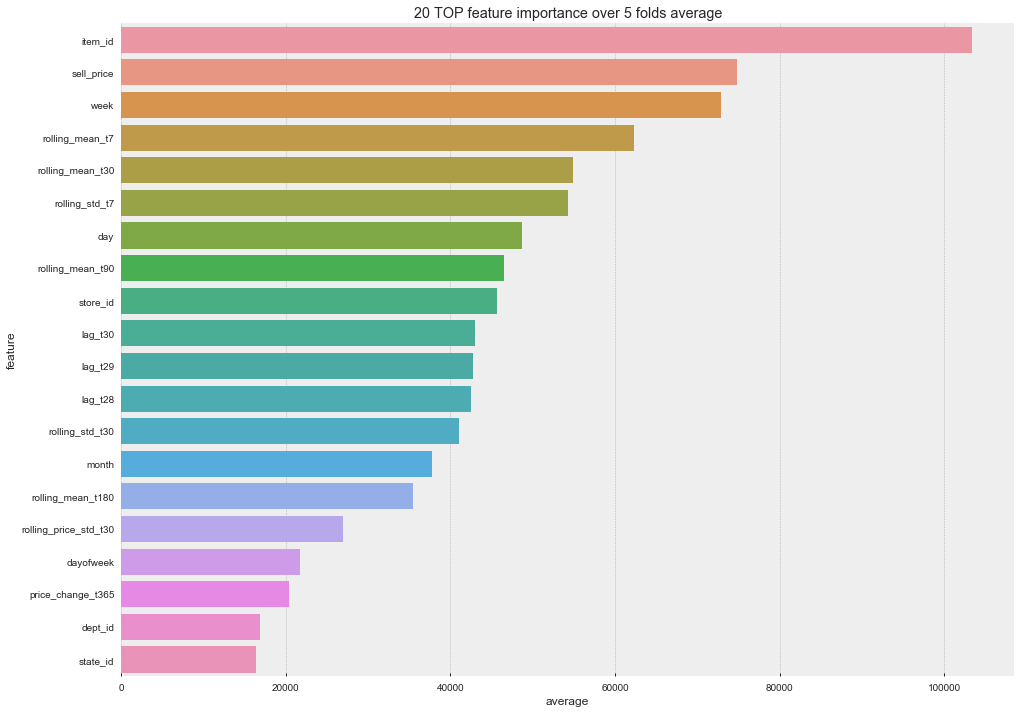

In [30]:
import seaborn as sns
feature_importances['average'] = feature_importances[[f'fold_{fold_n + 1}' for fold_n in range(folds.n_splits)]].mean(axis=1)
feature_importances.to_csv('feature_importances.csv')

plt.figure(figsize=(16, 12))
sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(20), x='average', y='feature');
plt.title('20 TOP feature importance over {} folds average'.format(folds.n_splits));